# Review of Experimental Results for NARMA-10

In [678]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from scipy.interpolate import make_interp_spline
import time

In [679]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('NARMA-experiment-' + str(df[0]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[0]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[0]) + ".pkl").best_trials], 
    ["study_146A", joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[1]) + ".pkl").best_trials], 
    ["study_146B", joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[2]) + ".pkl").best_trials], 
    ["study_1479", joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[3]) + ".pkl").best_trials], 
    ["study_147A", joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[4]) + ".pkl").best_trials], 
    ["study_147B", joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[5]) + ".pkl").best_trials], 
    ["study_1569", joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[6]) + ".pkl").best_trials], 
    ["study_156A", joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[7]) + ".pkl").best_trials], 
    ["study_156B", joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[8]) + ".pkl").best_trials], 
    ["study_1579", joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_value,  joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_trial,  joblib.load('NARMA-experiment-' + str(df[9]) + ".pkl").best_trials], 
    ["study_157A", joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[10]) + ".pkl").best_trials],
    ["study_157B", joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[11]) + ".pkl").best_trials],
    ["study_2469", joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[12]) + ".pkl").best_trials],
    ["study_246A", joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[13]) + ".pkl").best_trials],
    ["study_246B", joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[14]) + ".pkl").best_trials],
    ["study_2479", joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[15]) + ".pkl").best_trials],
    ["study_247A", joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[16]) + ".pkl").best_trials],
    ["study_247B", joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[17]) + ".pkl").best_trials],
    ["study_2569", joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[18]) + ".pkl").best_trials],
    ["study_256A", joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[19]) + ".pkl").best_trials],
    ["study_256B", joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[20]) + ".pkl").best_trials],
    ["study_2579", joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[21]) + ".pkl").best_trials],
    ["study_257A", joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[22]) + ".pkl").best_trials],
    ["study_257B", joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[23]) + ".pkl").best_trials],
    ["study_3469", joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[24]) + ".pkl").best_trials],
    ["study_346A", joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[25]) + ".pkl").best_trials],
    ["study_346B", joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[26]) + ".pkl").best_trials],
    ["study_3479", joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[27]) + ".pkl").best_trials],
    ["study_347A", joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[28]) + ".pkl").best_trials],
    ["study_347B", joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[29]) + ".pkl").best_trials],
    ["study_3569", joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[30]) + ".pkl").best_trials],
    ["study_356A", joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[31]) + ".pkl").best_trials],
    ["study_356B", joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[32]) + ".pkl").best_trials],
    ["study_3579", joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[33]) + ".pkl").best_trials],
    ["study_357A", joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[34]) + ".pkl").best_trials],
    ["study_357B", joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[35]) + ".pkl").best_trials],
    ["study_8469", joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[36]) + ".pkl").best_trials],
    ["study_846A", joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[37]) + ".pkl").best_trials],
    ["study_846B", joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[38]) + ".pkl").best_trials],
    ["study_8479", joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[39]) + ".pkl").best_trials],
    ["study_847A", joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[40]) + ".pkl").best_trials],
    ["study_847B", joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[41]) + ".pkl").best_trials],
    ["study_8569", joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[42]) + ".pkl").best_trials],
    ["study_856A", joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[43]) + ".pkl").best_trials],
    ["study_856B", joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[44]) + ".pkl").best_trials],
    ["study_8579", joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[45]) + ".pkl").best_trials],
    ["study_857A", joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[46]) + ".pkl").best_trials],
    ["study_857B", joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('NARMA-experiment-' + str(df[47]) + ".pkl").best_trials]])



In [680]:
studies = studies.sort_values(by=1)
studies = studies.reset_index(drop=True)
studies.head(20)

,0,1,2,3
0,study_247A,0.030781,"FrozenTrial(number=130, values=[0.030781299010...","[FrozenTrial(number=130, values=[0.03078129901..."
1,study_246A,0.031043,"FrozenTrial(number=147, values=[0.031042941682...","[FrozenTrial(number=147, values=[0.03104294168..."
2,study_1469,0.031134,"FrozenTrial(number=149, values=[0.031133951295...","[FrozenTrial(number=149, values=[0.03113395129..."
3,study_147A,0.031401,"FrozenTrial(number=149, values=[0.031401102848...","[FrozenTrial(number=149, values=[0.03140110284..."
4,study_8469,0.031532,"FrozenTrial(number=91, values=[0.0315321701939...","[FrozenTrial(number=91, values=[0.031532170193..."
5,study_357A,0.031566,"FrozenTrial(number=120, values=[0.031566062336...","[FrozenTrial(number=120, values=[0.03156606233..."
6,study_356A,0.031761,"FrozenTrial(number=97, values=[0.0317608161307...","[FrozenTrial(number=97, values=[0.031760816130..."
7,study_2569,0.031863,"FrozenTrial(number=114, values=[0.031862755175...","[FrozenTrial(number=114, values=[0.03186275517..."
8,study_256A,0.031953,"FrozenTrial(number=108, values=[0.031952781038...","[FrozenTrial(number=108, values=[0.03195278103..."
9,study_857A,0.032416,"FrozenTrial(number=126, values=[0.032416113478...","[FrozenTrial(number=126, values=[0.03241611347..."


## Confirm Trial Results
Make sure the above results can be duplicated

In [681]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        mse0 = mse(actual, predicted)
        rmse = math.sqrt(mse0)
        
        mae0 = mae(actual, predicted)
        
        r20 = r2(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        rmse = 100
        mae0 = 100
        r20 = 0
        
    except ValueError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (3)')
        rmse = 100
        mae0 = 100
        r20 = 0

    np.seterr(all='warn')
    return rmse, mae0, r20

def narma10(x):
    """ tenth-order NARMA system applied to the input signal
    """
    size = len(x)
    y = np.zeros(x.shape)
    for n in range(10,size):
            y[n] = 0.3*y[n-1] + 0.05*y[n-1]*(y[n-1]+y[n-2]+y[n-3] +y[n-4]+y[n-5]+y[n-6]+y[n-7]+y[n-8]+y[n-9]+y[n-10])+ 1.5*x[n-10]*x[n-1] + 0.1
    return y

def get_esn_data(x,y,trainsize,testsize,inscale=1.,inshift=0.):
        """ returns trainin, trainout, testin, testout
        """
        skip = 50 # NARMA initialization
        trainin = x[skip:skip+trainsize]
        trainin.shape = 1,-1
        trainout = y[skip:skip+trainsize]
        trainout.shape = 1,-1
        testin = x[skip+trainsize:skip+trainsize+testsize]
        testin.shape = 1,-1
        testout = y[skip+trainsize:skip+trainsize+testsize]
        testout.shape = 1,-1
        return trainin, trainout, testin, testout

#### Generate Data

(0.2, 0.75)

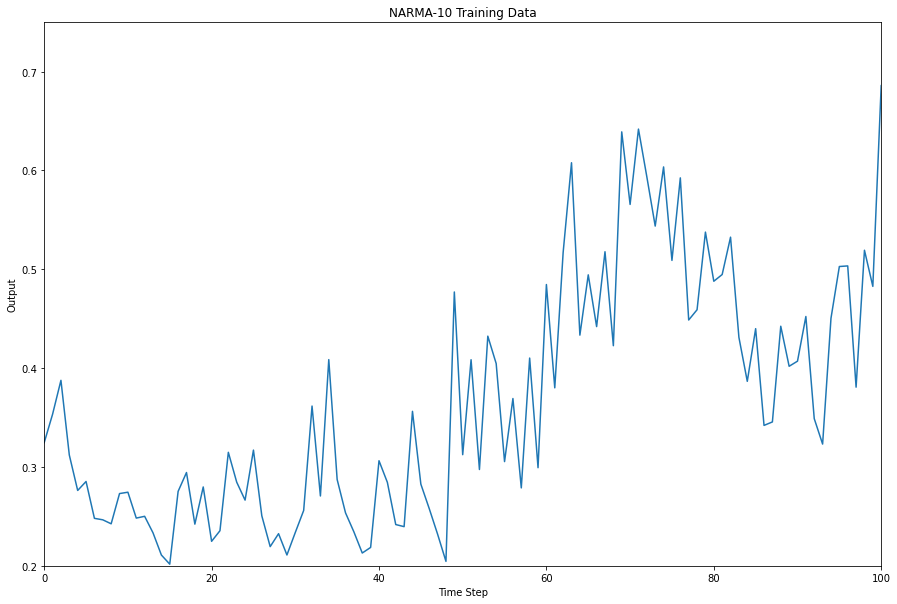

In [682]:
#Generate Data
trainsize = 1200
testsize = 2200

# generate train/test signals
size = trainsize+testsize+50
np.random.seed(0)
x = (np.random.uniform(0,0.5, size)).reshape(-1,1) #from the text
y = (narma10(x)).reshape(-1,1)               #from the text

# create in/outs with bias input
trainin, trainout, testin, testout = get_esn_data(x,y,trainsize,testsize)
trainin = np.transpose(trainin)
trainout = trainout.reshape(-1,1)
testin = np.transpose(testin)
testout = testout.reshape(-1,1)

z = np.arange(0, trainsize)

plt.figure(figsize=(15, 10))
plt.plot(z, trainout[:,0])
plt.xlabel('Time Step')
plt.ylabel('Output')
plt.title('NARMA-10 Training Data')
plt.xlim(0,100)
plt.ylim(0.20,0.75)

#### Trial vs Recreated

In [683]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 200
startState = np.zeros((1,N))

for i in range(0,10):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    
    model.sv = sv
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = trainin, teacher=trainout, washout=washout)

    model.sv = 0
    predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)

    nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
    print(studies.iloc[i,0])
    print("RMSE: " + str(studies.iloc[i,2].user_attrs['rmse']) + ", " + str(nrmse0))
    print("MAE: " + str(studies.iloc[i,2].user_attrs['MAE']) + ", " + str(mae0))
    print("R2: " + str(studies.iloc[i,2].user_attrs['R2']) + ", " + str(r20) + "\n")

study_247A
RMSE: 0.030781299010616676, 0.030781299010616676
MAE: 0.024531952204611716, 0.024531952204611716
R2: 0.9047277411210047, 0.9047277411210047

study_246A
RMSE: 0.031042941682152533, 0.031042941682152533
MAE: 0.024582318889242942, 0.024582318889242942
R2: 0.9031012191237925, 0.9031012191237925

study_1469
RMSE: 0.0311339512954238, 0.0311339512954238
MAE: 0.024608306317323733, 0.024608306317323733
R2: 0.9025322235865123, 0.9025322235865123

study_147A
RMSE: 0.03140110284898583, 0.03140110284898583
MAE: 0.02474787648583107, 0.02474787648583107
R2: 0.9008523608005048, 0.9008523608005048

study_8469
RMSE: 0.03153217019399775, 0.03153217019399775
MAE: 0.024633137944263007, 0.024633137944263007
R2: 0.9000229543735185, 0.9000229543735185

study_357A
RMSE: 0.03156606233617537, 0.03156606233617537
MAE: 0.024798106735038006, 0.024798106735038006
R2: 0.8998079195539659, 0.8998079195539659

study_356A
RMSE: 0.031760816130778156, 0.031760816130778156
MAE: 0.02500502281378534, 0.025005022813

# Questions to Answer:
### How Does Model Accuracy Change as We Increase the Number of Neurons, N?
### Which reservoir activation function is the best?
### Is there an overwhelming difference in how the distribution type changes the model?
### Which connections within the reservoir give the best setup for this pattern generation task?
### None of the models which ranked well used a tanh output activation: discuss.
### Time complexity of different model instantiations

# How Does Model Accuracy Change as We Increase the Number of Neurons, N?

In [684]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
w = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,studies.shape[0]): #pick a model
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

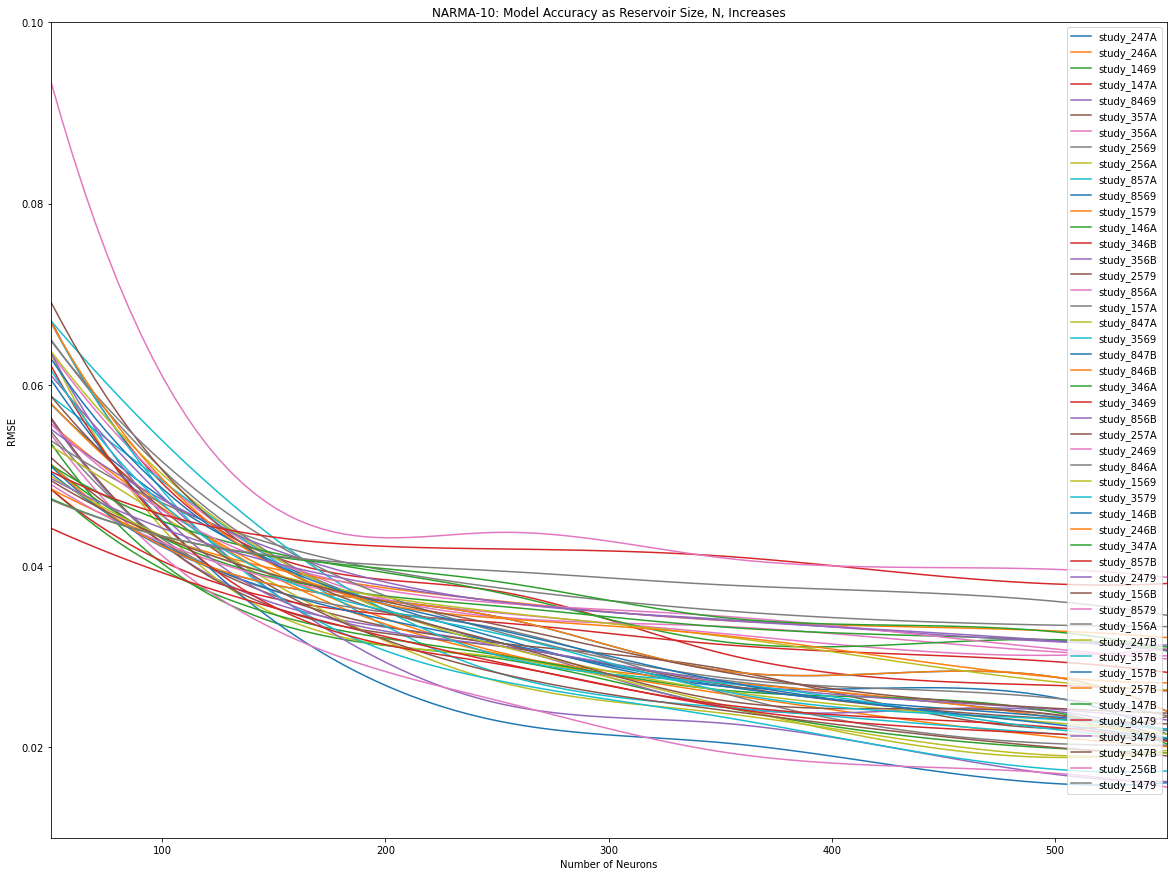

In [685]:
#add to plot
plt.figure(figsize=(20, 15))
for col in range(0,plotInfo3.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3.columns[col])

plt.legend()
plt.xlim([50,550])
plt.ylim([0.01,0.1])
plt.ylabel('RMSE')
plt.xlabel('Number of Neurons')
plt.title('NARMA-10: Model Accuracy as Reservoir Size, N, Increases')
plt.show()

In [686]:
#Cleanup the plot
pd.set_option('display.max_columns', None)
plotInfo3.iloc[:,:]

,study_247A,study_246A,study_1469,study_147A,study_8469,study_357A,study_356A,study_2569,study_256A,study_857A,study_8569,study_1579,study_146A,study_346B,study_356B,study_2579,study_856A,study_157A,study_847A,study_3569,study_847B,study_846B,study_346A,study_3469,study_856B,study_257A,study_2469,study_846A,study_1569,study_3579,study_146B,study_246B,study_347A,study_857B,study_2479,study_156B,study_8579,study_156A,study_247B,study_357B,study_157B,study_257B,study_147B,study_8479,study_3479,study_347B,study_256B,study_1479
0,0.057911,0.055728,0.053600,0.067157,0.056252,0.052015,0.063581,0.065052,0.063515,0.058774,0.060629,0.057994,0.048585,0.048490,0.061104,0.056446,0.054570,0.054923,0.053254,0.066942,0.050283,0.048535,0.051133,0.044179,0.063591,0.058793,0.049021,0.053868,0.063775,0.067114,0.051055,0.051299,0.051178,0.062180,0.055128,0.069212,0.055733,0.064901,0.049950,0.061693,0.062931,0.066939,0.047442,0.050444,0.049669,0.049446,0.093604,0.047319
1,0.040492,0.039347,0.033776,0.041015,0.035895,0.036757,0.040913,0.041168,0.034722,0.040674,0.033957,0.038833,0.034655,0.036429,0.037051,0.035447,0.033035,0.037257,0.038075,0.036951,0.037301,0.039696,0.038742,0.035388,0.036542,0.037597,0.038596,0.042399,0.040992,0.043103,0.037927,0.037940,0.041441,0.035497,0.041833,0.040204,0.040383,0.042538,0.039083,0.038918,0.040269,0.040061,0.041037,0.043186,0.040356,0.039014,0.046502,0.041136
2,0.032083,0.030540,0.029811,0.037233,0.031282,0.031509,0.034385,0.031603,0.029973,0.028245,0.022919,0.030343,0.030197,0.033767,0.024881,0.031187,0.025167,0.033129,0.027281,0.027376,0.031593,0.036163,0.035579,0.029405,0.031229,0.028216,0.034842,0.037616,0.031255,0.030162,0.034410,0.034414,0.037104,0.029211,0.036065,0.031638,0.035929,0.032776,0.034945,0.032555,0.032988,0.034247,0.038290,0.041888,0.036106,0.033528,0.043711,0.039463
3,0.026746,0.025947,0.024538,0.030420,0.024552,0.028693,0.033344,0.027433,0.024727,0.024442,0.020516,0.027189,0.026330,0.031349,0.022669,0.026970,0.019513,0.026074,0.023787,0.023379,0.026785,0.034015,0.033291,0.024733,0.027222,0.024121,0.032570,0.035095,0.026266,0.027099,0.028472,0.028478,0.031673,0.024488,0.034135,0.025207,0.034477,0.027703,0.032262,0.026247,0.027338,0.032358,0.034349,0.041107,0.034027,0.028365,0.040927,0.037930
4,0.026554,0.022515,0.020817,0.027238,0.024244,0.023426,0.031473,0.024885,0.019782,0.022410,0.017237,0.024894,0.025215,0.030085,0.018929,0.023981,0.017732,0.021328,0.020253,0.019030,0.024291,0.033202,0.032239,0.022950,0.024982,0.021167,0.030453,0.033786,0.023701,0.023667,0.028371,0.028374,0.031584,0.022067,0.032381,0.024263,0.032142,0.026212,0.028736,0.023659,0.023853,0.029127,0.033371,0.038842,0.032571,0.025149,0.039819,0.036935
5,0.021449,0.020072,0.019378,0.026218,0.020929,0.023364,0.030088,0.021816,0.019641,0.020714,0.016075,0.020855,0.020378,0.028269,0.016205,0.022574,0.015594,0.020236,0.019357,0.017371,0.021993,0.032105,0.031074,0.020664,0.023013,0.019055,0.030854,0.033310,0.021452,0.021064,0.023987,0.023990,0.030624,0.020783,0.031273,0.020726,0.029755,0.023488,0.026340,0.021966,0.020919,0.027111,0.030725,0.038068,0.030690,0.023769,0.038758,0.034570


In [687]:
plotInfo3Avg = plotInfo3.mean(axis=0)
plotInfo3Avg = plotInfo3Avg.sort_values()

In [688]:
plotInfo3_10 = plotInfo3[[plotInfo3Avg.index[0], plotInfo3Avg.index[1], plotInfo3Avg.index[2], plotInfo3Avg.index[3], plotInfo3Avg.index[4], plotInfo3Avg.index[5], plotInfo3Avg.index[6], plotInfo3Avg.index[7], plotInfo3Avg.index[8],plotInfo3Avg.index[9]]]

In [689]:
plotInfo3_10.head(10)

,study_856A,study_8569,study_3469,study_356B,study_1469,study_847A,study_146A,study_257A,study_3569,study_847B
0,0.054570,0.060629,0.044179,0.061104,0.053600,0.053254,0.048585,0.058793,0.066942,0.050283
1,0.033035,0.033957,0.035388,0.037051,0.033776,0.038075,0.034655,0.037597,0.036951,0.037301
2,0.025167,0.022919,0.029405,0.024881,0.029811,0.027281,0.030197,0.028216,0.027376,0.031593
3,0.019513,0.020516,0.024733,0.022669,0.024538,0.023787,0.026330,0.024121,0.023379,0.026785
4,0.017732,0.017237,0.022950,0.018929,0.020817,0.020253,0.025215,0.021167,0.019030,0.024291
5,0.015594,0.016075,0.020664,0.016205,0.019378,0.019357,0.020378,0.019055,0.017371,0.021993


In [690]:
orderedStudies = pd.DataFrame()
for i in plotInfo3Avg.index:
    orderedStudies = pd.concat([orderedStudies, studies.loc[studies.iloc[:,0] == i]])
orderedStudies = orderedStudies.reset_index(drop=True)
orderedStudies.head(10)

,0,1,2,3
0,study_856A,0.033131,"FrozenTrial(number=146, values=[0.033131127639...","[FrozenTrial(number=146, values=[0.03313112763..."
1,study_8569,0.032475,"FrozenTrial(number=136, values=[0.032474910395...","[FrozenTrial(number=136, values=[0.03247491039..."
2,study_3469,0.034159,"FrozenTrial(number=148, values=[0.034158693485...","[FrozenTrial(number=148, values=[0.03415869348..."
3,study_356B,0.033020,"FrozenTrial(number=113, values=[0.033020088707...","[FrozenTrial(number=113, values=[0.03302008870..."
4,study_1469,0.031134,"FrozenTrial(number=149, values=[0.031133951295...","[FrozenTrial(number=149, values=[0.03113395129..."
5,study_847A,0.033362,"FrozenTrial(number=149, values=[0.033362062499...","[FrozenTrial(number=149, values=[0.03336206249..."
6,study_146A,0.032880,"FrozenTrial(number=147, values=[0.032880426487...","[FrozenTrial(number=147, values=[0.03288042648..."
7,study_257A,0.034197,"FrozenTrial(number=106, values=[0.034196812134...","[FrozenTrial(number=106, values=[0.03419681213..."
8,study_3569,0.033661,"FrozenTrial(number=132, values=[0.033661162466...","[FrozenTrial(number=132, values=[0.03366116246..."
9,study_847B,0.033822,"FrozenTrial(number=137, values=[0.033821569439...","[FrozenTrial(number=137, values=[0.03382156943..."


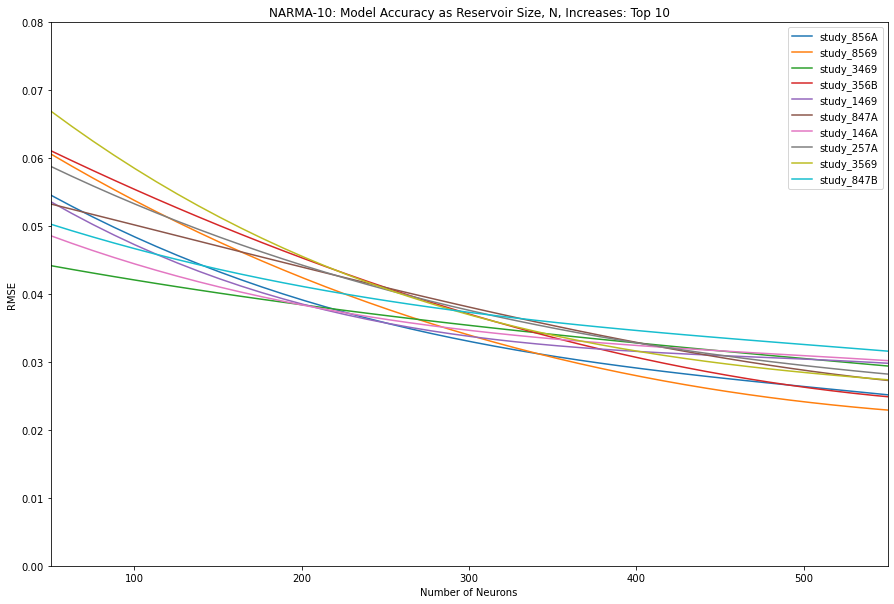

In [706]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3_10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3_10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3_10.columns[col])

plt.legend()
plt.xlim([50,550])
plt.ylim([0,0.08])
plt.ylabel('RMSE')
plt.xlabel('Number of Neurons')
plt.title('NARMA-10: Model Accuracy as Reservoir Size, N, Increases: Top 10')
plt.show()

# Time Complexity

In [703]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 250
x = np.arange(50,1550,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
w = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,10): #pick a model
    N = 50
    startState = np.zeros((1,N))
    p = orderedStudies.iloc[i,2].params['p']
    a = orderedStudies.iloc[i,2].params['a']
    dw = orderedStudies.iloc[i,2].params['dw']
    din = orderedStudies.iloc[i,2].params['din']
    sin = orderedStudies.iloc[i,2].params['sin']
    B = orderedStudies.iloc[i,2].params['B']
    isU2Y = orderedStudies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = orderedStudies.iloc[i,2].user_attrs['isY2Y']
    resFunc = orderedStudies.iloc[i,2].user_attrs['resFunc']
    outFunc = orderedStudies.iloc[i,2].user_attrs['outFunc']
    distribution = orderedStudies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            scores[k,1] = r20
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[orderedStudies.iloc[i,0]])), axis=1)

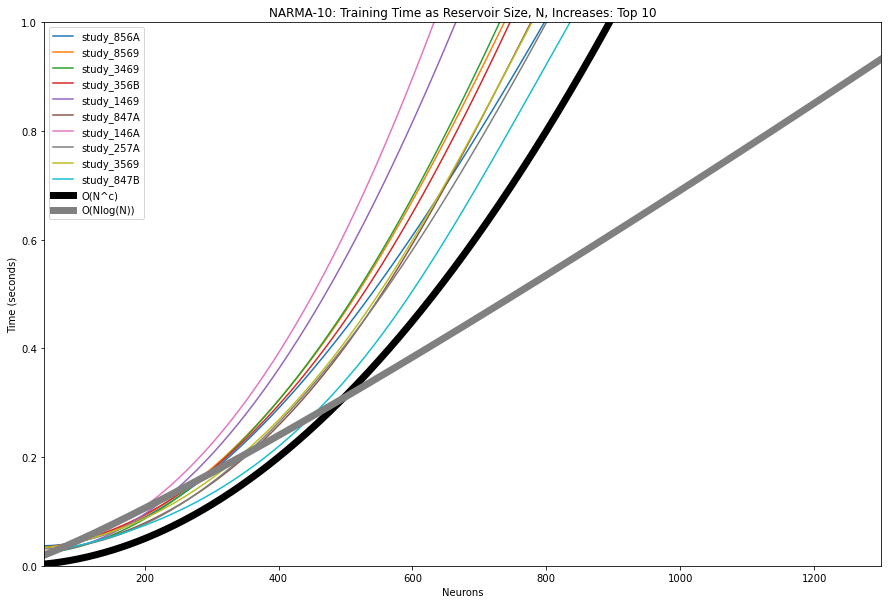

In [704]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimeTrain.columns[col])
    
n = np.arange(1,1300)
exponential = 0.00000125*np.power(n,2)
nlogn = 0.0001*n*np.log(n)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)
plt.plot(n,nlogn,label='O(Nlog(N))', color='#808080', linewidth=7)

plt.legend()
plt.xlim([50,1300])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.title('NARMA-10: Training Time as Reservoir Size, N, Increases: Top 10')
plt.show()

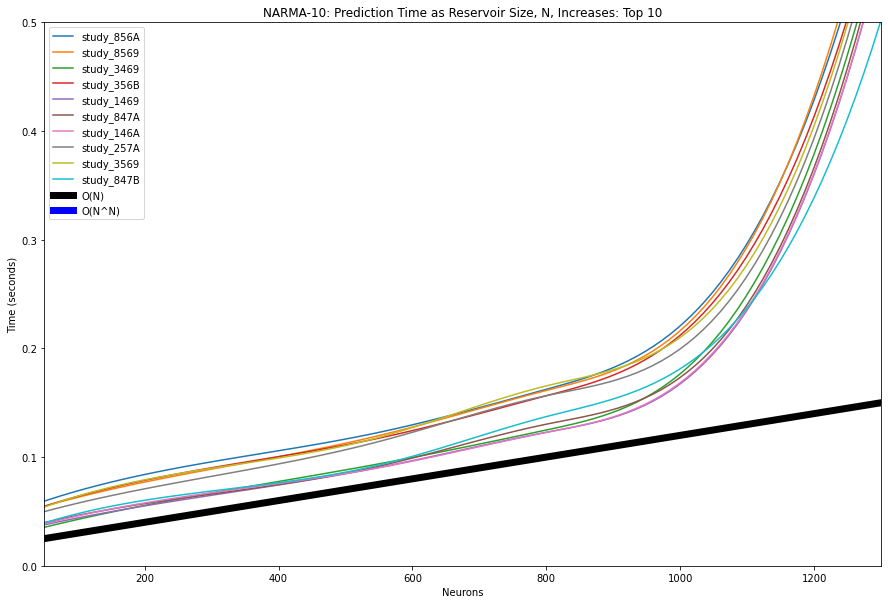

In [823]:
#add to plot
from scipy.special import factorial
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo3TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo3TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3TimePredict.columns[col])
    
n = np.arange(1,1350)
orderOfN = (0.0001*n)+0.02
nToN = 0.00001*factorial(n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)
plt.plot(n,nToN,label='O(N^N)', color='blue', linewidth=7)

plt.legend()
plt.xlim([50,1300])
plt.ylim([0,0.5])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.title('NARMA-10: Prediction Time as Reservoir Size, N, Increases: Top 10')
plt.show()

In [824]:
plotInfo3TimePredict

,study_856A,study_8569,study_3469,study_356B,study_1469,study_847A,study_146A,study_257A,study_3569,study_847B
0,0.059475,0.054676,0.035379,0.054724,0.037618,0.039622,0.038444,0.049814,0.053946,0.039397
1,0.095634,0.088943,0.066919,0.090177,0.064868,0.066007,0.067219,0.082296,0.089705,0.068768
2,0.122740,0.119817,0.093791,0.117420,0.090414,0.091635,0.090223,0.114324,0.118125,0.092688
3,0.162381,0.161306,0.124925,0.156438,0.122809,0.130268,0.122724,0.156496,0.165511,0.137252
4,0.252891,0.248650,0.207319,0.243048,0.195552,0.200799,0.196760,0.227046,0.237659,0.204771
5,0.636296,0.655446,0.583617,0.615780,0.562720,0.573702,0.562883,0.602626,0.615870,0.502411


### Which reservoir activation function is the best?

## Models that scored very similar, but used different activation function

In [374]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
w = np.zeros((11,1))
n = np.zeros((11,1))
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo0 = pd.DataFrame()
plotInfo0TimeTrain = pd.DataFrame()
plotInfo0TimePredict = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)
            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start

            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()

            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo0 = pd.concat((plotInfo0, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo0TimeTrain = pd.concat((plotInfo0TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo0TimePredict = pd.concat((plotInfo0TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

In [375]:
w

array([[0.03224912],
       [0.07047468],
       [0.12652443],
       [0.20469532],
       [0.32678444],
       [0.53582408],
       [0.70758113],
       [0.89634442],
       [1.09800708],
       [1.34999623],
       [1.61331265]])

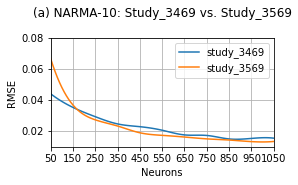

In [544]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.title('(a) NARMA-10: Study_3469 vs. Study_3569\n')
plt.xlabel('Neurons')
plt.ylabel('RMSE')
plt.xticks(np.arange(50, 1050+1, 100))
plt.ylim([0.01,0.08])
plt.grid()
plt.show()

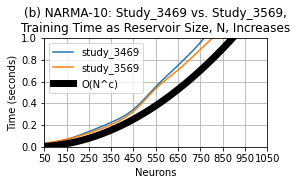

In [545]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b) NARMA-10: Study_3469 vs. Study_3569,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

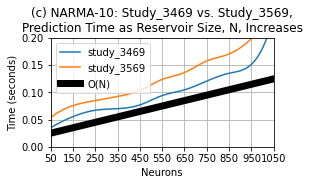

In [559]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10: Study_3469 vs. Study_3569,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

## Same exact model with different activation function

In [403]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo1 = pd.DataFrame()
count = 1

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo1TimeTrain = pd.DataFrame()
plotInfo1TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo1 = pd.concat((plotInfo1, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo1TimeTrain = pd.concat((plotInfo1TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo1TimePredict = pd.concat((plotInfo1TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [404]:
plotInfo1 = plotInfo1.rename(columns={"1": "study_3469", "2": "study_3569"})
plotInfo1TimeTrain = plotInfo1TimeTrain.rename(columns={"1": "study_3469", "2": "study_3569"})
plotInfo1TimePredict = plotInfo1TimePredict.rename(columns={"1": "study_3469", "2": "study_3569"})

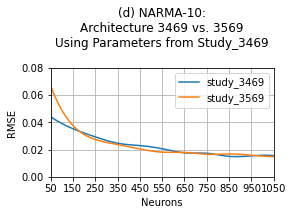

In [549]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(d) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3469\n')
plt.show()

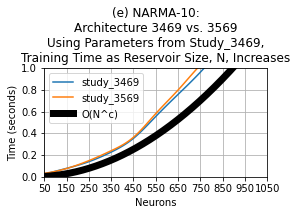

In [550]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(e) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3469,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

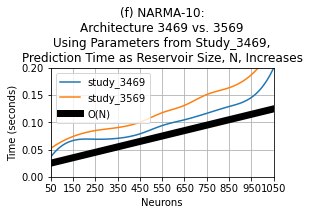

In [558]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3469,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [552]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo2 = pd.DataFrame()
count = 1

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo2TimeTrain = pd.DataFrame()
plotInfo2TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_3569'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo2 = pd.concat((plotInfo2, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo2TimeTrain = pd.concat((plotInfo2TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo2TimePredict = pd.concat((plotInfo2TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [553]:
plotInfo2 = plotInfo2.rename(columns={"1": "study_3469", "2": "study_3569"})
plotInfo2TimeTrain = plotInfo2TimeTrain.rename(columns={"1": "study_3469", "2": "study_3569"})
plotInfo2TimePredict = plotInfo2TimePredict.rename(columns={"1": "study_3469", "2": "study_3569"})

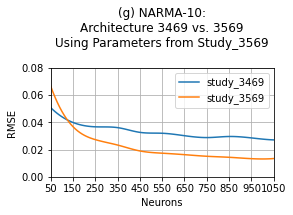

In [554]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(g) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3569\n')
plt.show()

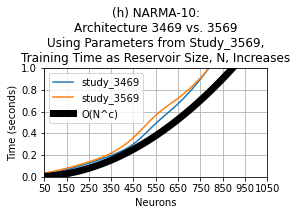

In [555]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h) NARMA-10:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3569,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

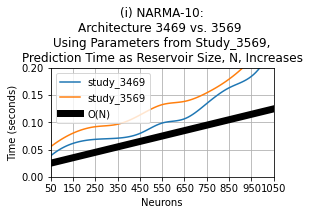

In [666]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.2])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) NARMA-10:\nArchitecture 3469 vs. 3569 \nUsing Parameters from Study_3569,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

### It seems that tanh seems to be performing the best long-term in all these scenarios.

# Is there an overwhelming difference in how the distribution type changes the model?

## How did the parameters vary between the models with different distributions?

In [425]:
print(studies.loc[studies.iloc[:,0] == 'study_856A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_856A'].iloc[0,2].params

study_856A


{'p': 0.9057390526428688,
 'a': 0.9658701881107126,
 'dw': 0.11046693137423193,
 'din': 0.5708395323337219,
 'sin': 0.21692143018417046,
 'B': 0.0017872808358900506}

In [426]:
print(studies.loc[studies.iloc[:,0] == 'study_8569'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_8569'].iloc[0,2].params

study_8569


{'p': 0.8800335099405139,
 'a': 0.9698099170726442,
 'dw': 0.2415378840596624,
 'din': 0.5902738897299908,
 'sin': 0.40625523522220347,
 'B': 0.0010018612745369552}

In [427]:
print(studies.loc[studies.iloc[:,0] == 'study_856B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_856B'].iloc[0,2].params

study_856B


{'p': 0.9972966507887525,
 'a': 0.9159757001345797,
 'dw': 0.5429074397567054,
 'din': 0.5818628757186146,
 'sin': 0.15060585252705055,
 'B': 0.0032335071176123396}

#### Plotted each Model w/ Different Parameters/Distribution

In [487]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo4TimeTrain = pd.DataFrame()
plotInfo4TimePredict = pd.DataFrame()

while(count < 3): #Select models for evaluation
    #Select a model
    i = 0
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo4 = pd.concat((plotInfo4, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo4TimeTrain = pd.concat((plotInfo4TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo4TimePredict = pd.concat((plotInfo4TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [488]:
plotInfo4 = plotInfo4.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo4TimeTrain = plotInfo4TimeTrain.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo4TimePredict = plotInfo4TimePredict.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

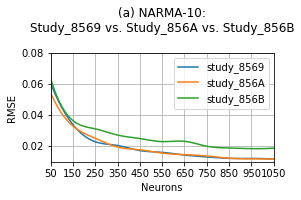

In [525]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(a) NARMA-10:\nStudy_8569 vs. Study_856A vs. Study_856B\n')
plt.show()

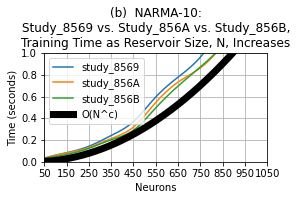

In [526]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b)  NARMA-10:\nStudy_8569 vs. Study_856A vs. Study_856B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

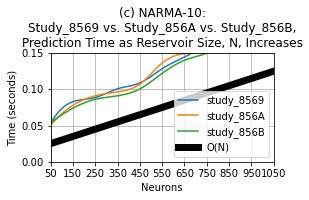

In [527]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10:\nStudy_8569 vs. Study_856A vs. Study_856B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

### Using the same set of parameters, does varying the distribution impair the model's ability to perform?

#### Using Parameter's of study_8569 optimized model

In [492]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo5 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo5TimeTrain = pd.DataFrame()
plotInfo5TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8569'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo5 = pd.concat((plotInfo5, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo5TimeTrain = pd.concat((plotInfo5TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo5TimePredict = pd.concat((plotInfo5TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [493]:
plotInfo5 = plotInfo5.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo5TimeTrain = plotInfo5TimeTrain.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo5TimePredict = plotInfo5TimePredict.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

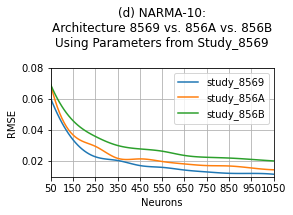

In [528]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(d) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_8569\n')
plt.show()

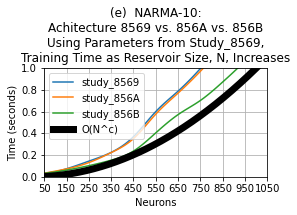

In [540]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(e)  NARMA-10:\nAchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_8569,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

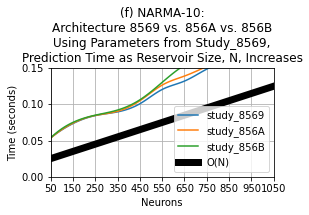

In [530]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_8569,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

#### Using Parameter's of study_856A optimized model

In [514]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo6 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo6TimeTrain = pd.DataFrame()
plotInfo6TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_856A'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo6 = pd.concat((plotInfo6, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo6TimeTrain = pd.concat((plotInfo6TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo6TimePredict = pd.concat((plotInfo6TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [515]:
plotInfo6 = plotInfo6.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo6TimeTrain = plotInfo6TimeTrain.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo6TimePredict = plotInfo6TimePredict.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

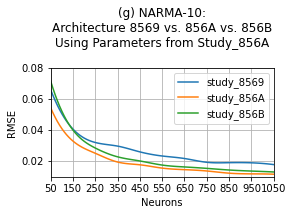

In [531]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(g) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856A\n')
plt.show()

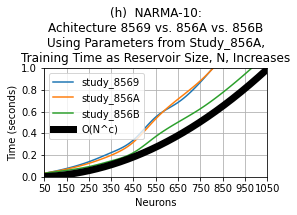

In [535]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000009*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h)  NARMA-10:\nAchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856A,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

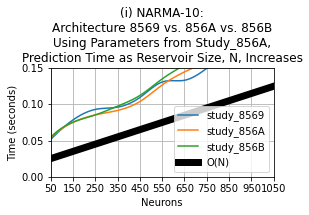

In [536]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856A,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

#### Using Parameter's of study_846B optimized model

In [504]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo7 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo7TimeTrain = pd.DataFrame()
plotInfo7TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo7 = pd.concat((plotInfo7, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo7TimeTrain = pd.concat((plotInfo7TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo7TimePredict = pd.concat((plotInfo7TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [505]:
plotInfo7 = plotInfo7.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo7TimeTrain = plotInfo7TimeTrain.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})
plotInfo7TimePredict = plotInfo7TimePredict.rename(columns={"0": "study_8569", "1": "study_856A", "2": "study_856B"})

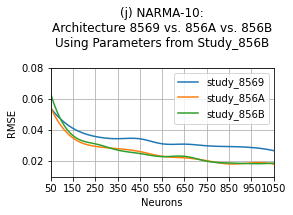

In [537]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7.columns[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.08])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(j) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856B\n')
plt.show()

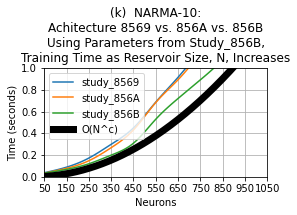

In [538]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(k)  NARMA-10:\nAchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856B,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

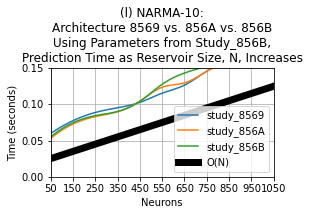

In [539]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) NARMA-10:\nArchitecture 8569 vs. 856A vs. 856B\nUsing Parameters from Study_856B,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

# Which connections within the reservoir give the best setup for this pattern generation task?

## How did the parameters vary between the models with different connections?

In [560]:
print(studies.loc[studies.iloc[:,0] == 'study_1469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_1469'].iloc[0,2].params

study_1469


{'p': 0.9995278165648598,
 'a': 0.9992022508413905,
 'dw': 0.6900523668340726,
 'din': 0.42375994521891847,
 'sin': 1.218842573437632,
 'B': 0.0012541732376229735}

In [561]:
print(studies.loc[studies.iloc[:,0] == 'study_2469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_2469'].iloc[0,2].params

study_2469


{'p': 0.9693466608948665,
 'a': 0.883062661982362,
 'dw': 0.2547448601246535,
 'din': 0.21142438768079586,
 'sin': 1.3722078390559793,
 'B': 0.0010058530959217659}

In [562]:
print(studies.loc[studies.iloc[:,0] == 'study_3469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_3469'].iloc[0,2].params

study_3469


{'p': 0.909308207037915,
 'a': 0.9996309516952484,
 'dw': 0.32140439694068756,
 'din': 0.9205723136968145,
 'sin': 0.4975669769214306,
 'B': 0.0010079864338779004}

In [563]:
print(studies.loc[studies.iloc[:,0] == 'study_8469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_8469'].iloc[0,2].params

study_8469


{'p': 0.975054697724155,
 'a': 0.9421737183892908,
 'dw': 0.05516066431710226,
 'din': 0.2783764695422861,
 'sin': 1.1778127066496846,
 'B': 0.0010046208482548883}

#### Plotted each Model w/ Different Parameters/Distribution

In [600]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo8= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo8TimeTrain = pd.DataFrame()
plotInfo8TimePredict = pd.DataFrame()

while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    #uConn = False
    #yConn = False
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
        #uConn = True
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
        #uConn = True
        #yConn = True
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
        #yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo8 = pd.concat((plotInfo8, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo8TimeTrain = pd.concat((plotInfo8TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo8TimePredict = pd.concat((plotInfo8TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [601]:
plotInfo8 = plotInfo8.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo8TimeTrain = plotInfo8TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo8TimePredict = plotInfo8TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

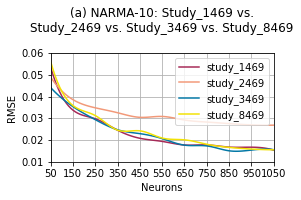

In [645]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,plotInfo8.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8.columns[col], color=colors[col])

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.06])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE')
plt.title('(a) NARMA-10: Study_1469 vs.\nStudy_2469 vs. Study_3469 vs. Study_8469\n')
plt.show()

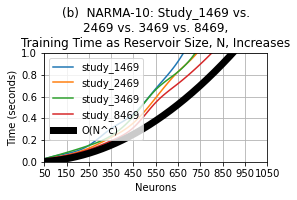

In [570]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000125*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(b)  NARMA-10: Study_1469 vs.\nStudy_2469 vs. Study_3469 vs. Study_8469\n,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

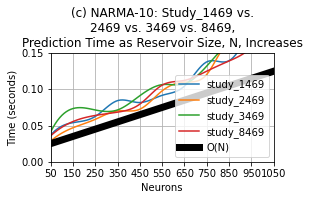

In [571]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) NARMA-10: Study_1469 vs.\nStudy_2469 vs. Study_3469 vs. Study_8469\n,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

### Using the same set of parameters, does varying the connection impair the model's ability to perform?

In [574]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo9= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo9TimeTrain = pd.DataFrame()
plotInfo9TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo9 = pd.concat((plotInfo9, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo9TimeTrain = pd.concat((plotInfo9TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo9TimePredict = pd.concat((plotInfo9TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [575]:
plotInfo9 = plotInfo9.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo9TimeTrain = plotInfo9TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo9TimePredict = plotInfo9TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

In [610]:
plotInfo9.head()

,study_1469,study_2469,study_3469,study_8469
0,0.053600,0.053928,0.049795,0.050251
1,0.033776,0.033810,0.031183,0.031222
2,0.029811,0.029817,0.025742,0.025749
3,0.024538,0.024540,0.020599,0.020606
4,0.020817,0.020818,0.016697,0.016698


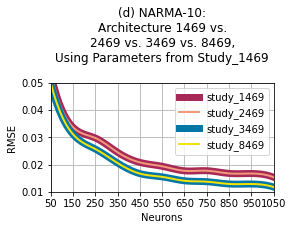

In [644]:
#add to plot
plt.figure(figsize=(4, 2))
changeWidth = 7
size = plotInfo9.shape[1]
colors = ['#A62957','#F29979','#0378A6','#F2E205']
for col in range(0,int(size / 2)):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth - 5
    
changeWidth = 7
for col in range(int(size / 2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo9.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9.columns[col],linewidth=changeWidth, color=colors[col])
    changeWidth = changeWidth- 5

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE') 
plt.title('(d) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_1469\n')
plt.show()

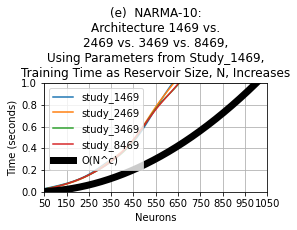

In [577]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(e)  NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_1469,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

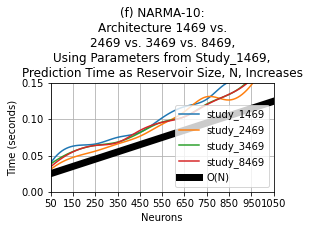

In [578]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_1469,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [579]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo10= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo10TimeTrain = pd.DataFrame()
plotInfo10TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo10 = pd.concat((plotInfo10, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo10TimeTrain = pd.concat((plotInfo10TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo10TimePredict = pd.concat((plotInfo10TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [581]:
plotInfo10 = plotInfo10.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo10TimeTrain = plotInfo10TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo10TimePredict = plotInfo10TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

In [665]:
plotInfo10.max(axis=1) - plotInfo10.min(axis=1)

0     0.000447
1     0.000466
2     0.000230
3     0.000491
4     0.000533
5     0.000576
6     0.000797
7     0.000667
8     0.000909
9     0.000584
10    0.000697
dtype: float64

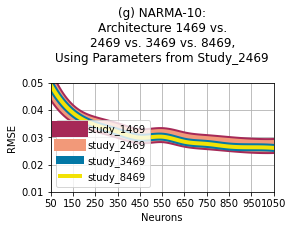

In [657]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
changeWidth = 16
for col in range(0,plotInfo10.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10.columns[col], color=colors[col], linewidth = changeWidth)
    changeWidth = changeWidth - 4

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE') 
plt.title('(g) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_2469\n')
plt.show()

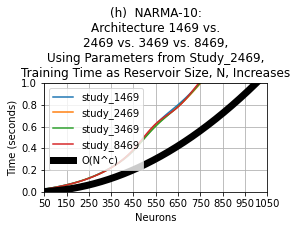

In [649]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(h)  NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_2469,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

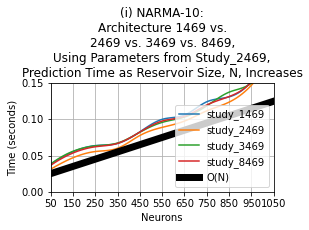

In [650]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_2469,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [585]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo11= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo11TimeTrain = pd.DataFrame()
plotInfo11TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_3469'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo11 = pd.concat((plotInfo11, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo11TimeTrain = pd.concat((plotInfo11TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo11TimePredict = pd.concat((plotInfo11TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [586]:
plotInfo11 = plotInfo11.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo11TimeTrain = plotInfo11TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo11TimePredict = plotInfo11TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

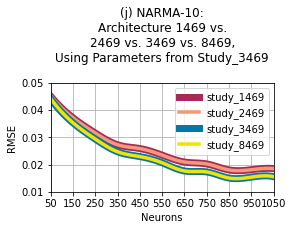

In [658]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo11.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo11.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11.columns[col], color=colors[col], linewidth=changeWidth)
    changeWidth = changeWidth / 2

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE') 
plt.title('(j) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_3469\n')
plt.show()

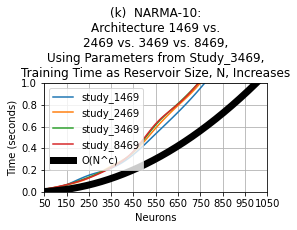

In [656]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(k)  NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_3469,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

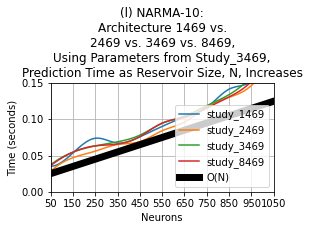

In [659]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_3469,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

In [590]:
np.random.seed(0)
K = 1
L = 1
N = 100                    #From text
v = (np.random.uniform(-1,1, size)).reshape(-1,1) #from text
sv = 0.0001                #From text
sfb = 0                    #No feedback required
dfb = 0
outAlg = 1  
isBias = True
washout = 200
startState = np.zeros((1,N))

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo12= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((11,1))
n = np.zeros((11,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo12TimeTrain = pd.DataFrame()
plotInfo12TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_8469'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.sv = sv
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout)
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            model.sv = 0
            predicted = model.run(input_u=testin, time=testin.shape[0],washout=washout, state=startState)
            end = time.time()
            
            nrmse0, mae0, r20 = getScores(testout[washout:], predicted)
            scores[k,0] = nrmse0
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]
        no_outliers_time_train = timesTrain[not_outlier]
        no_outliers_time_predict = timesPredict[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo12 = pd.concat((plotInfo12, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo12TimeTrain = pd.concat((plotInfo12TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo12TimePredict = pd.concat((plotInfo12TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [591]:
plotInfo12 = plotInfo12.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo12TimeTrain = plotInfo12TimeTrain.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})
plotInfo12TimePredict = plotInfo12TimePredict.rename(columns={"0": "study_1469", "1": "study_2469", "2": "study_3469", "3": "study_8469"})

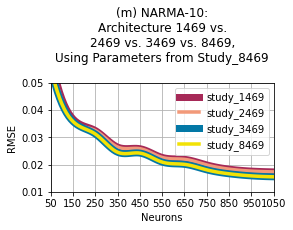

In [660]:
#add to plot
plt.figure(figsize=(4, 2))
colors = ['#A62957','#F29979','#0378A6','#F2E205']
size = plotInfo12.shape[1]
changeWidth = 7
for col in range(0,int(size/2)):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2
    
changeWidth = 7
for col in range(int(size/2), size):
    X_Y_Spline = make_interp_spline(x, plotInfo12.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12.columns[col], linewidth = changeWidth, color=colors[col])
    changeWidth = changeWidth / 2

plt.legend()
plt.xlim([50,1050])
plt.ylim([0.01,0.05])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('RMSE') 
plt.title('(m) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_8469\n')
plt.show()

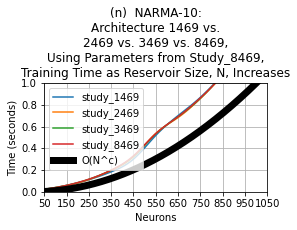

In [661]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000001*np.power(n,2)
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1])
plt.xlabel('Neurons')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)')
plt.title('(n)  NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_8469,\nTraining Time as Reservoir Size, N, Increases')
plt.show()

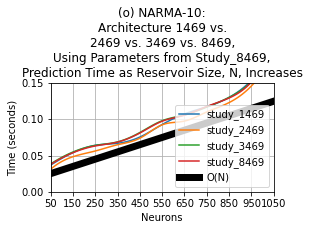

In [662]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0001*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,0.15])
plt.xlabel('Neurons')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(o) NARMA-10:\nArchitecture 1469 vs.\n2469 vs. 3469 vs. 8469,\nUsing Parameters from Study_8469,\nPrediction Time as Reservoir Size, N, Increases')
plt.show()

## Which connections within the reservoir give the worst setup for this pattern generation task?

## Which connections within the reservoir give the worst setup for this pattern generation task?

The following models generated awful R2 scores:

In [37]:
for i in range (25,48):
    print(studies.iloc[i,0])
    print(studies.iloc[i,2].user_attrs['R2'])
    print("\n")

study_257A
0.8824117789721142


study_2469
0.8809266804871115


study_846A
0.8788609672901537


study_1569
0.8782621211739812


study_3579
0.8780778384162559


study_146B
0.8772127898365275


study_246B
0.8757534932708558


study_347A
0.8725289705201777


study_857B
0.8716189438750475


study_2479
0.8713613706797164


study_156B
0.8677294005587078


study_8579
0.8645748816050141


study_156A
0.8618173479477139


study_247B
0.8599503295280041


study_357B
0.8578847626451456


study_157B
0.8574752347938395


study_257B
0.8565883973700833


study_147B
0.8522913198482123


study_8479
0.8502415138372102


study_3479
0.8486600044141288


study_347B
0.845052091675038


study_256B
0.8372024626426378


study_1479
0.8371092367767856




All these models perform relatively well, although some worse than others. However, some model instiations may have just found a better parameter set during the optimization process so it is fair to say these models are competitive with one another given the best set of parameters for a given model.

# Parameter Selections

In [266]:
for i in range (0,48):
    print(studies.iloc[i,0])
    print(studies.iloc[i,2].params)
    print("\n")

study_247A
{'p': 0.9984714610199803, 'a': 0.9782888506453707, 'dw': 0.86290447749028, 'din': 0.18880144251880432, 'sin': 0.4992419444392993, 'B': 0.001292422605710504}


study_246A
{'p': 0.9997175035630158, 'a': 0.983096223493701, 'dw': 0.19087170981606377, 'din': 0.24566378618363977, 'sin': 0.40264815154773115, 'B': 0.001967366975999692}


study_1469
{'p': 0.9995278165648598, 'a': 0.9992022508413905, 'dw': 0.6900523668340726, 'din': 0.42375994521891847, 'sin': 1.218842573437632, 'B': 0.0012541732376229735}


study_147A
{'p': 0.9996500579984876, 'a': 0.9992028971012092, 'dw': 0.2155109025558308, 'din': 0.3745235362529932, 'sin': 0.6165886379293268, 'B': 0.001987868033308768}


study_8469
{'p': 0.975054697724155, 'a': 0.9421737183892908, 'dw': 0.05516066431710226, 'din': 0.2783764695422861, 'sin': 1.1778127066496846, 'B': 0.0010046208482548883}


study_357A
{'p': 0.9825184014506614, 'a': 0.8979637951738226, 'dw': 0.7484314882817774, 'din': 0.3342879167355141, 'sin': 0.17012183015800186,